dcd_ch5_hw

# Chapter 5 Homework

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/GitHub

/content/drive/MyDrive/GitHub


In [3]:
%cd 'soil-physics-theory'

/content/drive/MyDrive/GitHub/soil-physics-theory


In [4]:
%cd 'content/chapter-5'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5


In [5]:
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1
**Use the program PSP_travelTimeAnalysis to compute the water content
of the soil sample dataTDRSoil.dat. Change the values of bulk density, temperature
and solid-phase dielectric permittivity to investigate the effects on the
computed water content by using the dielectric mixing model.**

1  Campbell
2  van Genuchten
3  van Genuchten with m = 1-1/n restriction
4  Ippisch-van Genuchten
5  Campbell-Ippisch-van Genuchten
Choose model type: 2

Fitting
iterations nr: 100
sum of squared residuals: 7.973940443055363e-05

thetaS =  0.40204161633561925
thetaR =  0.0
alpha =  0.014153205522067374
n =  0.5210880606716829
m =  0.702983793557867


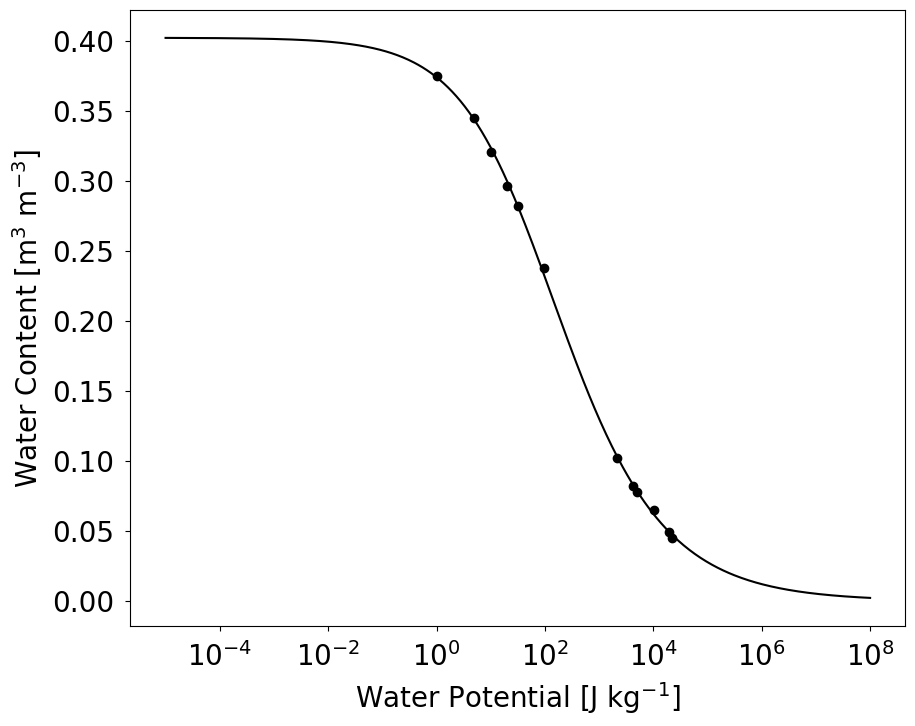

<Figure size 640x480 with 0 Axes>

In [9]:
run main

In [6]:
from PSP_travelTime import computeTravelTime

computeTravelTime()

TypeError: computeTravelTime() missing 3 required positional arguments: 'probeHandle', 'permittivity', and 'Vp'

In [ ]:
rawdata = readDataFile('dataTDRSoil.dat',0,'\t',0)

wv_avg = rawdata[0][0] #wave average
Vp = rawdata[0][1] #wave velocity
nrPoints = int(rawdata[0][2][0]) #numberof output points
cbl = rawdata[0][3] #cable length
windowWidth = rawdata[0][4] #window length
probeHandle = rawdata[0][5] #probe length
proff = rawdata[0][6] #probe offset
mult = rawdata[0][7] #multiplier
y = rawdata[0][8:]

In [ ]:
bulkDensity = 1350
first = 0
last = len(y)
index1 = indexOfMaxVector(y, first, last)
index2 = indexOfMinVector(y, first, last)
av = avg(y, index1, index2)
noV = normalizeVector(y)
bulkPermittivity =getBulkPermittivity(cbl+probeHandle, y, Vp)
theta = getWaterContentMalicki(bulkPermittivity[2], bulkDensity)
print(theta)

13722.971147165696


## Problem 2
**If the temperature of the soil liquid phase increases, does the bulk dielectric permittivity
increase or decrease? What effect would this change have on soil wate
content computation?**

In [ ]:
print(getLiquidPermittivity(10))
print(getLiquidPermittivity(40))
print(getLiquidPermittivity(90))

83.9345199
73.1454801
55.16374710000001


In [7]:
from PSP_travelTime import compute_bulk_permittivity

temps = np.arange(0,70,1)
perm_reference = 80
compute_bulk_permittivity(temperature, permittivity_ref)

ImportError: cannot import name 'compute_bulk_permittivity' from 'PSP_travelTime' (/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5/PSP_travelTime.py)

As temperature increases the dielectric permittivity decreases. Considering that more heat means more particle interation, and thus less ability to resist discharge of energy through electrical field.

## Problem 3
**Compute the matric water potential for water in a saturated pore 10 μm in diameter,
at 20 ◦C. The surface tension and liquid density at this temperature are
72.75 × 10–3 Nm–1 and 1027.8 kgm–3, respectively.**

## Problem 4
**By using the integration presented in the program
PSP_columnWaterContent.py, compute the total amount of soil water
in a clay soil for a profile that is 1m deep. Use the parameters presented in
Table 5.4**

## Problem 5
**By using the two files sand.txt and silt_loam.text, fit Campbell’s equation,
van Genuchten’s equation with no parameter restriction and van Genucthen’s
equation with the restriction m = 1 – 1/n. Print the parameters and discuss the differences
obtained by using the different models. Also discuss the differences in the
estimated parameters for the two soils.**

## Problem 6
**Compute the water content at field capacity (assume ψFC = –33 J kg–1), and
permanent wilting point (assume ψPWP = –1500 J kg–1) using van Genuchten’s
equation for a soil having the following parameters: α = 0.15, n = 1.35, θr = 0.01
and θs = 0.46. The units of water potential are J kg–1. Plant available water is assumed
to be the difference between these values. Compute the plant available water
of the soil.**

## Problem 7
**Derive the capacity for Campbell’s and van Genuchten’s equations by computing
the derivatives of the two functions with respect t psi**
.